<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named 'movies'.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# (rows, cols)
print('Rows: {}, Cols: {}'.format(movies.shape[0], movies.shape[1]))

Rows: 979, Cols: 6


#### Check the data type of each column.

In [8]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [9]:
# By default, mean() excludes null values 
#   (can you check how many 0-hour or NaN-hour movies there are?)
print('Average movie duration: {}'.format(movies.duration.mean()))

Average movie duration: 120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
DISPLAY_COLS = ['title', 'duration']
movies_sorted = movies.sort_values('duration', ascending=False)

print('LONGEST')
print(movies_sorted[DISPLAY_COLS].iloc[:5])

print('--------')
print('SHORTEST')
print(movies_sorted[DISPLAY_COLS].iloc[-5:])

LONGEST
                                 title  duration
476                             Hamlet       242
157                 Gone with the Wind       238
78         Once Upon a Time in America       229
142  Lagaan: Once Upon a Time in India       224
445               The Ten Commandments       220
--------
SHORTEST
                           title  duration
293                    Duck Soup        68
88                       The Kid        68
258  The Cabinet of Dr. Caligari        67
338          Battleship Potemkin        66
389                       Freaks        64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

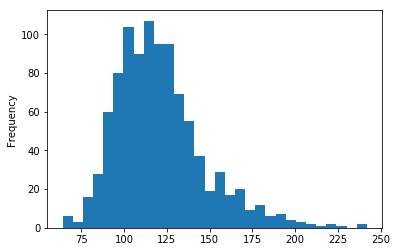

In [90]:
# choose number of bins ~= sqrt(number of movies)
movies.duration.describe()
movies.duration.plot(kind='hist', bins=30);

#### Use a box plot to display that same data.

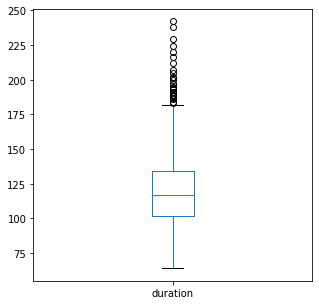

In [11]:
movies.duration.plot(kind='box',figsize=(5,5));

In [12]:
# Approx. how many movies are outliers (above the upper line)?
movies.describe()   # Shows the quartiles graphed in the box plot
movies[movies.duration>175].title.value_counts().sum()

40

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

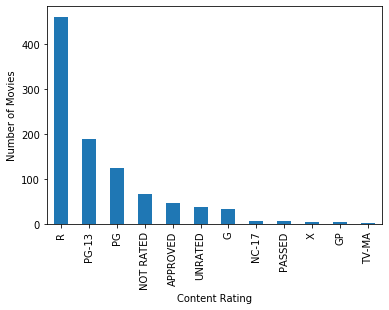

In [14]:
ax = movies.content_rating.value_counts().plot(kind='bar');
ax.set_xlabel("Content Rating");
ax.set_ylabel("Number of Movies");

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
find_cont = ["NOT RATED","APPROVED","PASSED","GP"]
movies.content_rating = movies.content_rating.replace(find_cont,"UNRATED")

In [16]:
# Very important to always verify! 
#  Is this what you'd expect compared to the run above?
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
find_cont = ['X','TV-MA']
movies.content_rating = movies.content_rating.replace(find_cont,'NC-17')

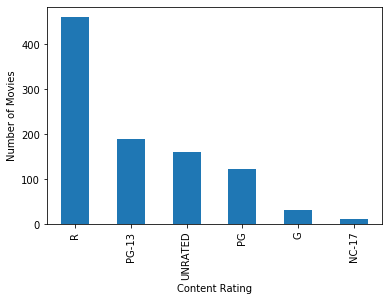

In [18]:
ax = movies.content_rating.value_counts().plot(kind='bar');
ax.set_xlabel("Content Rating");
ax.set_ylabel("Number of Movies");

In [19]:
# Very important to always verify! 
#  Is this what you'd expect compared to the run above?
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [20]:
movies.info()   # Quickly shows number of non-null per column

# Alternately, shows exact counts - null=1 (True), non-null=0 (False).
movies.apply(pd.isnull).agg('sum')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [21]:
movies.content_rating.fillna(value="UNRATED", inplace=True)

# Verify there are no longer null values
movies.content_rating.isnull().sum()

0

In [22]:
movies[movies['title'] == 'Where Eagles Dare']  #for example we pick.

,star_rating,title,content_rating,genre,duration,actors_list
649,7.7,Where Eagles Dare,UNRATED,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
mean_long = movies[movies.duration>=120].star_rating.mean()
mean_short = movies[movies.duration<120].star_rating.mean()
print("Avg long movie rating: {}".format(mean_long))
print("Avg short movie rating: {}".format(mean_short))

Avg long movie rating: 7.948898678414097
Avg short movie rating: 7.838666666666665


#### Use a visualization to detect whether there is a relationship between duration and star rating.

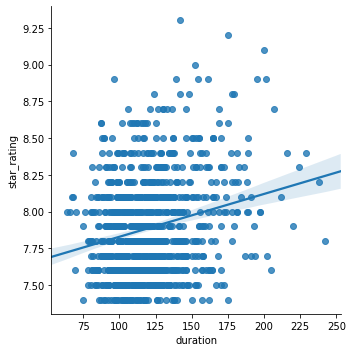

In [24]:
import seaborn as sns
#movies.plot(x="duration", y='star_rating', kind='scatter', figsize=(15,7))
sns.lmplot(x="duration", y='star_rating', data=movies);

#### Calculate the average duration for each genre.

In [25]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

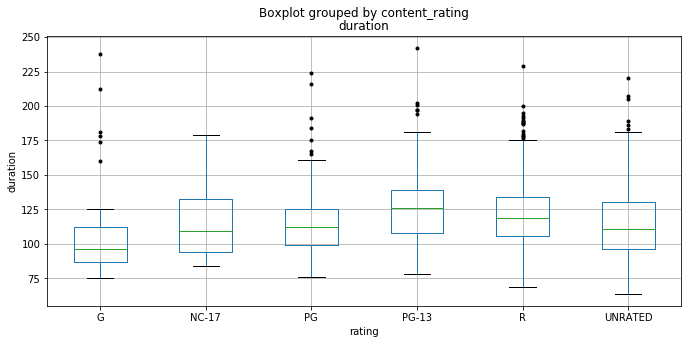

In [26]:
# BOXPLOT content rating and duration plot

movies.boxplot(column='duration', by='content_rating', 
               figsize=(11,5), sym='k.');

plt.xlabel('rating');
plt.ylabel('duration');

#### Determine the top rated movie (by star rating) for each genre.

In [27]:
# OPTION ONE - SUCCINCT
# + According to the documentation, groupby PRESERVES ROW ORDER.
# + So, sorting by value before the groupby guarantees 
#      each group is ordered by rating.
# + Downside: Movies tied for highest rating not shown.

DISPLAY_COLS = ['genre', 'title', 'star_rating']

movies_sorted = movies.sort_values('star_rating', ascending=False)
movies_sorted.groupby('genre').head(1)[DISPLAY_COLS]

,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
3,Action,The Dark Knight,9.0
5,Drama,12 Angry Men,8.9
6,Western,"The Good, the Bad and the Ugly",8.9
7,Adventure,The Lord of the Rings: The Return of the King,8.9
8,Biography,Schindler's List,8.9
39,Horror,Psycho,8.6
38,Mystery,Rear Window,8.6
35,Comedy,Modern Times,8.6
30,Animation,Spirited Away,8.6


In [31]:
# OPTION TWO - LOOP THROUGH EACH GENRE
# + This method is more verbose but shows tied movies.

top_rate = movies.groupby('genre').star_rating.max()
genre_list = movies.genre.unique().tolist()

for g in genre_list:
    print("Top Movies For: " + g, \
    movies[(movies.star_rating==top_rate[g]) & (movies.genre==g)].title.tolist(), "\n")

Top Movies For: Crime ['The Shawshank Redemption'] 

Top Movies For: Action ['The Dark Knight'] 

Top Movies For: Drama ['12 Angry Men', 'Fight Club'] 

Top Movies For: Western ['The Good, the Bad and the Ugly'] 

Top Movies For: Adventure ['The Lord of the Rings: The Return of the King'] 

Top Movies For: Biography ["Schindler's List"] 

Top Movies For: Comedy ['Life Is Beautiful', 'City Lights', 'Modern Times'] 

Top Movies For: Animation ['Spirited Away'] 

Top Movies For: Mystery ['Rear Window'] 

Top Movies For: Horror ['Psycho'] 

Top Movies For: Film-Noir ['The Third Man'] 

Top Movies For: Sci-Fi ['Blade Runner'] 

Top Movies For: History ['Battleship Potemkin'] 

Top Movies For: Thriller ['Shadow of a Doubt'] 

Top Movies For: Family ['E.T. the Extra-Terrestrial'] 

Top Movies For: Fantasy ['The City of Lost Children'] 



In [32]:
# METHOD THREE - ***THIS IS INCORRECT***
# + Make sure you understand why this method does not work!
# + This hopefully shows the importance of verifying your work manually

# This is incorrect because the (title, star_rating) are wrongly paired!
#  + max() gets the largest value **in each column independently**
# So, in the Crime genre: 
#  + "Zodiac" is the "largest" (highest alphabetical) title
#  + 9.3 is the largest star_rating. 
#  + **This does NOT mean Zodiac has a star_rating of 9.3!**

movies.groupby(by=['genre'], sort=False)['title','star_rating'].max() #.head(11)

,title,star_rating
genre,,
Crime,Zodiac,9.3
Action,Yojimbo,9.0
Drama,Zulu,8.9
Western,Unforgiven,8.9
Adventure,True Grit,8.9
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Animation,Wreck-It Ralph,8.6
Mystery,Vertigo,8.6


In [33]:
# Always verify your work manually!

# Unlike what is shown in the above table,
#    Zodiac *actually* has a low star rating. 
# So the above solution -though intuitive- is incorrect.
movies[movies['title']=='Zodiac']

,star_rating,title,content_rating,genre,duration,actors_list
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [34]:
# OPTION ONE -- We could look through a list of duplicated
#   titles and determine manually whether duplicates exist.

# Passing False marks ALL duplicates, including the first occurrence.
# We copy it since we'll be adding a column later
dups = movies[movies['title'].duplicated(False)].copy()

dups

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [35]:
# OPTION TWO - AUTOMATEDLY COMPARE
# + In the table above, all duplicate titles have different durations.
# + So, for simplicity's sake we will leave the general case aside and 
#     only test the durations field against a single movie per title.
#     (Otherwise, the solution may be rather lengthy.)
# + If each movie has a different duration, then they 
#     are not duplicates. However, if they have the same durations,
#     they may or may not be duplicates.

# First, we create a dict -- {title: duration of its first movie}
first_duration = dups.groupby('title').duration.agg('first').to_dict()

# Now, we create a new col that indicates if the movie's duration 
#    is the same as the first movie in the same genre
dups['same_duration'] = dups.apply(
    lambda row: int(first_duration[row.title] == row.duration), axis=1)

# Finally, the sum of the equal column per movie should be 1!
#  (One of the movies has the same duration as itself.)
print('Any duplicates for these titles?')
dups.groupby('title')['same_duration'].sum() > 1

Any duplicates for these titles?


title
Dracula                            False
Les Miserables                     False
The Girl with the Dragon Tattoo    False
True Grit                          False
Name: same_duration, dtype: bool

Note the general case is difficult to do automatedly because:

+ Every field must be compared to be equal, e.g. Series.equal
+ Actors could be the same but in different order in the lists, making a custom equality comparison required
+ Each *pair* of movies with the same name must be tested. It is not sufficient to only test each movie against a single movie with the same name.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [36]:
genre_counts = movies.genre.value_counts()

genre_counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [37]:
# From the list above, manually create ...
relevant_genres = ['Drama', 'Comedy', 'Action', 'Crime', 
                   'Biography', 'Adventure', 'Animation', 
                   'Horror', 'Mystery']

genre_mask = movies['genre'].isin(relevant_genres)
print(movies[genre_mask].groupby('genre')['star_rating'].mean())

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [38]:
# Create genres list automatedly via filtering
relevant_genres = list(genre_counts[genre_counts>10].index)

genre_mask = movies['genre'].isin(relevant_genres)
print(movies[genre_mask].groupby('genre')['star_rating'].mean())

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [39]:
# Answer:
booleanSeries = movies.genre.value_counts() #count genres for number of films
booleanSeries = booleanSeries >= 10
booleanSeries

movieMeans = movies.groupby('genre').star_rating.mean()
movieMeans[booleanSeries]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [40]:
movieMeans = movies.groupby('genre').star_rating.agg(['count', 'mean'])
movieMeans['counts'] = movieMeans['count']

# We use 'counts' because 'count' is a DataFrame method
movieMeans[movieMeans.counts >= 10]

,count,mean,counts
genre,,,
Action,136,7.884559,136
Adventure,75,7.933333,75
Animation,62,7.914516,62
Biography,77,7.862338,77
Comedy,156,7.822436,156
Crime,124,7.916935,124
Drama,278,7.902518,278
Horror,29,7.806897,29
Mystery,16,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [41]:
# For example ...

# Get list of actors per movie
movies.actors_list.value_counts()

# Avg star rating of movies with Morgan Freeman
freeman_mask = movies.actors_list.str.contains("Morgan Freeman")
movies[freeman_mask].star_rating.mean()

8.0875

In [42]:
# Harry Potter has most movies with same cast of characters.
# (Note this technique may not be truthful, since actor names 
#    could be the same but stored in a different order!)

movies['actors_list'].value_counts()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                       6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                         3
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                                 2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']                    2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']                   2
                                                                            ..
[u'Chiwetel Ejiofor', u'Michael Kenneth Williams', u'Michael Fassbender']    1
[u'Steve Carell', u'Toni Collette', u'Greg Kinnear']                         1
[u'Nicolas Cage', u'Meryl Streep', u'Chris Cooper']                          1
[u'Chevy Chase', u"Beverly D'Angelo", u'Juliette Lewis']                     1
[u'Monica Bellucci', u'Giuseppe Sulfaro', u'Luciano Federico']               1
Name: actors_list, Length: 969, dtype: int64